## TODO

Jake's face detection. but use for detecting the cars p505

In [1]:
%matplotlib inline
#%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

(400, 4096)
Dataset consists of 400 faces
Extracting the top 25 Cluster centers - MiniBatchKMeans...
done in 0.067s


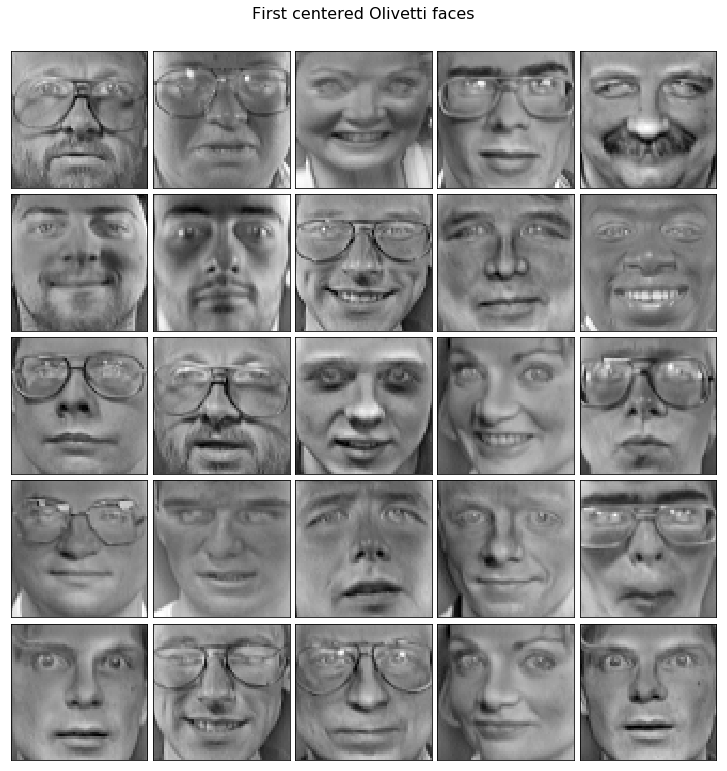

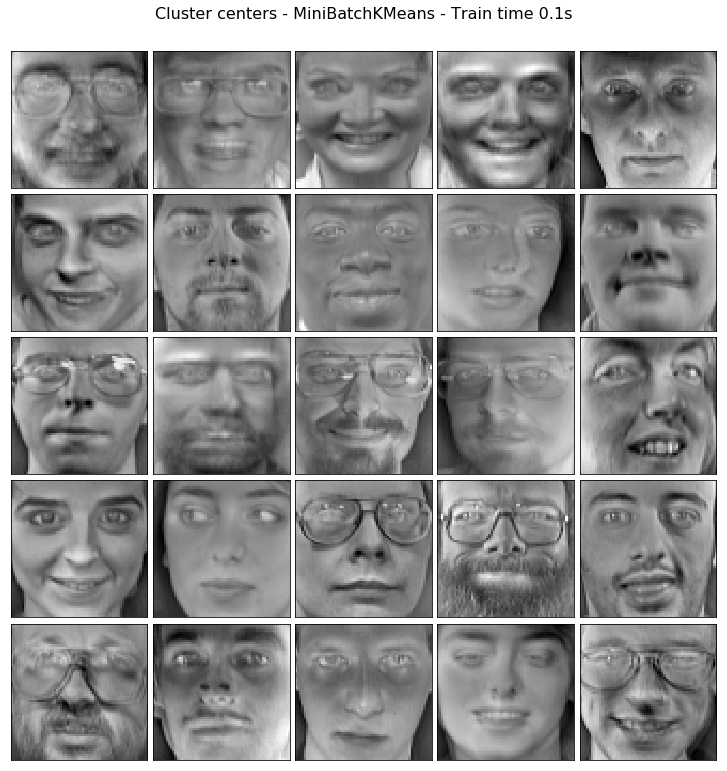

In [5]:
from sklearn.datasets import fetch_olivetti_faces
from numpy.random import RandomState
from sklearn.cluster import MiniBatchKMeans
from time import time

#n_row, n_col = 2, 3
n_row, n_col = 5, 5
n_components = n_row * n_col
image_shape = (64, 64)
rng = RandomState(0)
dataset = fetch_olivetti_faces(shuffle=True, random_state=rng)
faces = dataset.data
n_samples, n_features = faces.shape

#global centering
faces_centered = faces - faces.mean(axis=0) 
# local centering
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1) 
print(faces_centered.shape)
print("Dataset consists of %d faces" % n_samples)
###############################################################################

def plot_gallery(title, images, n_col=n_col, n_row=n_row): 
    plt.figure(figsize=(2. * n_col, 2.26 * n_row)) 
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)
    

# List of the different estimators, whether to center and transpose the
# problem, and whether the transformer uses the clustering API.
estimators = [
    ('Cluster centers - MiniBatchKMeans',
        MiniBatchKMeans(n_clusters=n_components, tol=1e-3, batch_size=20,
                        max_iter=50, random_state=rng),
     True),
]

###############################################################################
# Plot a sample of the input data
plot_gallery("First centered Olivetti faces", faces_centered[:n_components]) 
###############################################################################
# Do the estimation and plot it

for name, estimator, center in estimators:
    print("Extracting the top %d %s..." % (n_components, name)) 
    t0 = time()
    data = faces
    if center:
        data = faces_centered 
    estimator.fit(data)
    train_time = (time() - t0)
    print("done in %0.3fs" % train_time)
    if hasattr(estimator, 'cluster_centers_'):
        components_ = estimator.cluster_centers_ 
    else:
        components_ = estimator.components_ 
    
    if hasattr(estimator, 'noise_variance_'):
        plot_gallery("Pixelwise variance",
                     estimator.noise_variance_.reshape(1, -1), n_col=1, n_row=1)
        
    plot_gallery('%s - Train time %.1fs' % (name, train_time),components_[:n_components])

plt.show()
             


In [80]:
?np.mean

In [6]:
from sklearn.mixture import GMM

x = np.linspace(0,4*2*np.pi, 10000)
y = np.sin(x)
n = np.zeros(shape=y.shape)
n[50] = 1
y = y+n
#print(x,y)
#plt.plot(x,y)
#plt.show()

def ts2design(y, d = 10):
    r = []
    for i in range(len(y)-d):
        cy = y[i:i+d]
        r.append(cy.tolist())
    return np.array(r)


X=ts2design(y)
#print(X)
gmm = GMM(n_components=16, covariance_type='full', random_state=6666).fit(X)



/Users/singhal/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/singhal/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/singhal/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/singhal/anaconda3/lib/python3.6/site-packages/sklearn/utils/de

/Users/singhal/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/singhal/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/singhal/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/singhal/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecati

In [7]:
bic = gmm.bic(X)

print(bic)

gmm_params = gmm.get_params(deep=True)

print("gmm_params=", gmm_params)

print(gmm.converged_)
print(X)

-406567.465032
gmm_params= {'covariance_type': 'full', 'init_params': 'wmc', 'min_covar': 0.001, 'n_components': 16, 'n_init': 1, 'n_iter': 100, 'params': 'wmc', 'random_state': 6666, 'tol': 0.001, 'verbose': 0}
True
[[ 0.          0.00251352  0.00502703 ...,  0.01759377  0.02010685
   0.0226198 ]
 [ 0.00251352  0.00502703  0.0075405  ...,  0.02010685  0.0226198
   0.02513261]
 [ 0.00502703  0.0075405   0.01005393 ...,  0.0226198   0.02513261
   0.02764526]
 ..., 
 [-0.03015773 -0.02764526 -0.02513261 ..., -0.0125673  -0.01005393
  -0.0075405 ]
 [-0.02764526 -0.02513261 -0.0226198  ..., -0.01005393 -0.0075405
  -0.00502703]
 [-0.02513261 -0.0226198  -0.02010685 ..., -0.0075405  -0.00502703
  -0.00251352]]


/Users/singhal/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


In [8]:
y_pred = gmm.predict(np.array([X[0], X[1]]))

/Users/singhal/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


In [9]:
y_pred


array([13, 13])

In [10]:
X[0]

array([ 0.        ,  0.00251352,  0.00502703,  0.0075405 ,  0.01005393,
        0.0125673 ,  0.01508058,  0.01759377,  0.02010685,  0.0226198 ])

In [11]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture

import time


n_gaussians = 16
dims = 10

def get_rand_data():
    covariance_type = 'diag'
    points = np.array(np.random.rand(10000, dims), dtype=np.float32)
    query_points = np.array(np.random.rand(10, dims), dtype=np.float32)
    return (points, query_points)

def get_sine_data():
    
    x = np.linspace(0,4*2*np.pi, 100)
    y = np.sin(x)
    n = np.zeros(shape=y.shape)
    n[50] = 1
    y = y+n
    #print(x,y)
    #plt.plot(x,y)
    #plt.show()

    def ts2design(y, dims = dims):
        r = []
        for i in range(len(y)-dims):
            cy = y[i:i+dims]
            r.append(cy.tolist())
        return np.array(r)
    
    X=ts2design(y)

    test_X = np.array([X[0].tolist(), X[1].tolist()])
    return (X, test_X )

points, query_points = get_rand_data()
points, query_points = get_sine_data()

covariance_type = 'diag'
start = time.time()

#print(points)
#GMM with sklearn
gmm_sk = BayesianGaussianMixture(n_components = n_gaussians, covariance_type=covariance_type)
gmm_sk.fit(points)
mid_t = time.time()
elapsed = time.time() - start
print("learning took "+ str(elapsed))

probas = []
labels = []
scores = []
for i in range(1):
    proba = gmm_sk.predict_proba(query_points)
    label = gmm_sk.predict(query_points)
    score = gmm_sk.score_samples(query_points)
    probas.append(proba)
    labels.append(label)
    scores.append(score)

end_t = time.time() - mid_t

_debug = False
_debug = True
if _debug:
    print("predictions took " + str(end_t))   
    print("probas=",probas)
    print("labels=",labels)
    print("scores=", scores)
    print("score=", gmm_sk.score(query_points))
    print("probas2=", np.exp(scores))
    print("gmm_weights=", gmm_sk.weights_)
    print("gmm_means=", gmm_sk.means_)
    print("gmm_cov=", gmm_sk.covariances_)


print(query_points)

print(type(query_points))
past_dims = 6
fut_dims = dims - past_dims
tqp = query_points[:,:-fut_dims]
print(tqp)
mu_p = np.mean(tqp, axis=0, dtype=np.float32)
print("mu_p=", mu_p)

mu_f = np.full((fut_dims), np.mean(mu_p))
print("mu_f=", mu_f)

sigma_p = np.cov(tqp)
print("sigma_p", sigma_p)

sigma_f = sigma_p

mu_k = np.hstack((mu_p, mu_f))
print(mu_k)

learning took 0.053360939025878906
predictions took 0.0013229846954345703
probas= [array([[  7.34462419e-28,   9.97442695e-01,   2.13491992e-46,
          4.63323753e-41,   7.92310837e-65,   5.83803994e-13,
          6.70693408e-28,   6.57283094e-28,   1.63850446e-75,
          1.30432864e-22,   4.99904043e-52,   5.72162016e-28,
          6.94041644e-28,   5.04563741e-28,   4.68808261e-28,
          2.55730495e-03],
       [  1.50044952e-28,   1.02994146e-02,   8.48911484e-52,
          8.40150208e-36,   5.43285390e-65,   6.32897020e-19,
          1.37017439e-28,   1.34277817e-28,   5.36969704e-79,
          2.62415428e-16,   1.12307842e-49,   1.16888243e-28,
          3.82737516e-34,   1.03078442e-28,   9.57738763e-29,
          9.89700585e-01]])]
labels= [array([ 1, 15])]
scores= [array([-2.32286009, -2.12543027])]
score= -2.22414518114
probas2= [[ 0.09799292  0.11938159]]
gmm_weights= [ 0.010986    0.11944742  0.08963435  0.08865349  0.11183332  0.07275879
  0.01003927  0.00984051  

### Guassian Mixture Model and Time Series (e.g Stocks, or Signals)

{'mu_k_p': array([ 0.21411329,  0.21660997,  0.21910591,  0.2216011 ,  0.22409552,
        0.22658915]), 'mu_k_f': array([ 0.22908199,  0.23157401,  0.2340652 ,  0.23655554]), 'cov_k_pp': array([[ 0.09229892, -0.00795184, -0.00820169, -0.00845162, -0.00870163,
        -0.00895172],
       [-0.00795184,  0.09179956, -0.00845113, -0.0087009 , -0.00895076,
        -0.00920069],
       [-0.00820169, -0.00845113,  0.09130034, -0.00895027, -0.00919997,
        -0.00944975],
       [-0.00845162, -0.0087009 , -0.00895027,  0.09080127, -0.00944927,
        -0.00969888],
       [-0.00870163, -0.00895076, -0.00919997, -0.00944927,  0.09030235,
        -0.0099481 ],
       [-0.00895172, -0.00920069, -0.00944975, -0.00969888, -0.0099481 ,
         0.08980359]]), 'cov_k_pf': array([[-0.00920189, -0.00945214, -0.00970246, -0.00995286],
       [-0.0094507 , -0.00970079, -0.00995096, -0.0102012 ],
       [-0.0096996 , -0.00994953, -0.01019954, -0.01044962],
       [-0.00994858, -0.01019835, -0.0104482 

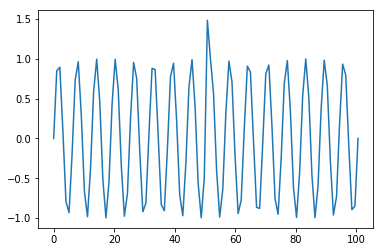

In [12]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture

import time

class ts_gmm(object):
    def __init__(self, win_size, *args, **kwargs):
        self.ts = np.array([])
        self.ts_dims = win_size
        self.ts_x = np.array([])
        self.ts_y = np.array([])
        self.trained = False
        self.X = np.array([[]]) # design matrix
        n_gaussians = 16
        covariance_type = "full"
        #self.gmm = BayesianGaussianMixture(n_components = n_gaussians, 
        #                                   covariance_type=covariance_type,
        #                                   max_iter=300
        #                                  )
        self.gmm = GaussianMixture(n_components = n_gaussians, 
                                           covariance_type=covariance_type,
                                           max_iter=300
                                          )
    def ts2X(self, np_z, dims):
        z = np_z.tolist()
        r = []
        for i in range(len(y)-dims):
            cy = y[i:i+dims]
            r.append(cy.tolist())
        return np.array(r)    
    
    def data_get_sine(self, n=1000):
    
        x = np.linspace(0,16*2*np.pi, n)
        y = np.sin(x)
        n = np.zeros(shape=y.shape)
        n[50] = 1
        y = y+n
        #print(x,y)
        #plt.plot(x,y)
        #plt.show()

        self.ts_x = x
        self.ts_y = y
        
        X=self.ts2X(np.array(y), self.ts_dims)

        test_X = np.array([X[0].tolist(), X[1].tolist()])
        return (X, test_X )
    
    def fit(self, ts):
        X = self.ts2X(ts, self.ts_dims)
        self.X = X
        self.trained = True
        r = self.gmm.fit(X)
        return r

    def predict(self, ts_seg):
        if not self.trained:
            print("model is not been trained")
            return
            
       
        part_stats = self.partition_stats(ts_seg)
        
        ts_seg_f = []
        for k, stats in enumerate(part_stats):
            mu_k_p = stats["mu_k_p"]
            ts_seg_k_f = stats["mu_k_f"]
            cov_k_pp_inv = np.linalg.inv(stats["cov_k_pp"])
            cov_k_fp = stats["cov_k_fp"]
            ts_seg_shift = ts_seg - mu_k_p
            ts_seg_k_f += np.matmul(np.matmul(cov_k_fp, cov_k_pp_inv), ts_seg_shift)
            ts_seg_f.append(ts_seg_k_f)
            
        np_ts_seg_f = np.array(ts_seg_f)
        
        #mu_k_f = part_stats[0]["mu_k_f"]
        mu_k_f = np.full(shape=part_stats[0]["mu_k_f"].shape, fill_value=0)
        ts_seg_ext = np.hstack((ts_seg,mu_k_f))
        np_probas = self.gmm.predict_proba([ts_seg_ext])
        ts_seg_f = np.dot(np_ts_seg_f.T, np_probas.T)
        return ts_seg_f
        
    def partition_stats(self, ts_seg):
        ts_seg_dim = ts_seg.shape[0]
        fit_dim = self.X.shape[1]
        fut_dim = fit_dim - ts_seg_dim
        
        #DEBUG print(ts_seg_dim, fut_dim)
        mu = self.gmm.means_
        cov = self.gmm.covariances_
        part_stats = []
        for k in range(mu.shape[0]):
            mu_k = mu[k]
            cov_k = cov[k]
            mu_k_p = mu_k[:ts_seg_dim]
            mu_k_f = mu_k[ts_seg_dim:]
            cov_k_pp = cov_k[:ts_seg_dim,:ts_seg_dim]
            cov_k_pf = cov_k[:ts_seg_dim,ts_seg_dim:]
            cov_k_fp = cov_k[ts_seg_dim:,:ts_seg_dim]
            cov_k_ff = cov_k[ts_seg_dim:,ts_seg_dim:]
            stats = {}
            stats["mu_k_p"] = mu_k_p
            stats["mu_k_f"] = mu_k_f
            stats["cov_k_pp"] = cov_k_pp
            stats["cov_k_pf"] = cov_k_pf
            stats["cov_k_fp"] = cov_k_fp
            stats["cov_k_ff"] = cov_k_ff
            part_stats.append(stats)
            
        return part_stats    
        

ts_est = ts_gmm(win_size=10)
points, query_points = ts_est.data_get_sine(n=100)
past_dims = 6
fut_dims = dims - past_dims
tqp = query_points[:,:-fut_dims]

ts_est.fit(points)
ts_seg = tqp[0]

ps = ts_est.partition_stats(ts_seg)
print(ps[0])
#print(ts_est.gmm.covariances_[0])

f_k = ts_est.predict(ts_seg)
print(f_k)
print(query_points[0])
print(tqp)

plt.plot(ts_est.ts_x,ts_est.ts_y)
plt.show()
